In [0]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null 
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Generate auth tokens for Colab

from google.colab import auth 
auth.authenticate_user()
  
# Generate creds for the Drive FUSE library.

from oauth2client.client import GoogleCredentials 
creds = GoogleCredentials.get_application_default()
import getpass 
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass() 
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive


print ('Files in Drive:')
!ls drive/

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145653 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from tqdm import tqdm
import matplotlib.pyplot as plt


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('drive/Colab Notebooks/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

# Pre-Processing

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


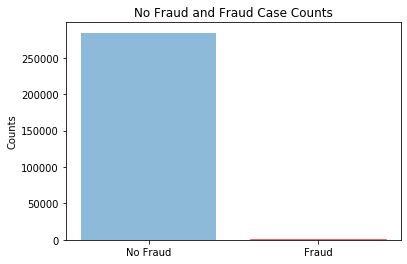

In [0]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
#Count classes
counts = df['Class'].value_counts()
labels = ('No Fraud','Fraud')
y_pos = np.arange(len(labels))
# Plotting class bar graph
barlist = plt.bar(y_pos, counts, align='center', alpha=0.5)
barlist[1].set_color('r')
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title('No Fraud and Fraud Case Counts')

plt.show()

In [0]:
counts

0    284315
1       492
Name: Class, dtype: int64

In [0]:

#Normalize Amount column
amount_unscaled = df[['Amount']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
amount_scaled = min_max_scaler.fit_transform(amount_unscaled)
df['Amount'] = pd.DataFrame(amount_scaled)

#Normalize Time column
time_unscaled = df[['Time']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
time_scaled = min_max_scaler.fit_transform(time_unscaled)
df['Time'] = pd.DataFrame(time_scaled)

#Print normalied df
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


## Train test split original df


In [0]:
orig_X = df.drop('Class', axis=1)
orig_y = df['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_ind, test_ind in skf.split(orig_X, orig_y):
    print("Train:", train_ind, "Test:", test_ind)
    orig_Xtrain, orig_Xtest = orig_X.iloc[train_ind], orig_X.iloc[test_ind]
    orig_ytrain, orig_ytest = orig_y.iloc[train_ind], orig_y.iloc[test_ind]

orig_Xtrain = orig_Xtrain.values
orig_Xtest = orig_Xtest.values
orig_ytrain = orig_ytrain.values
orig_ytest = orig_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(orig_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(orig_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(orig_ytrain))
print(test_counts_label/ len(orig_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


## Random Undersampling before cross validation(Create undersample df)

No Frauds 50.0 % of the undersampled dataset
Frauds 50.0 % of the undersampled dataset


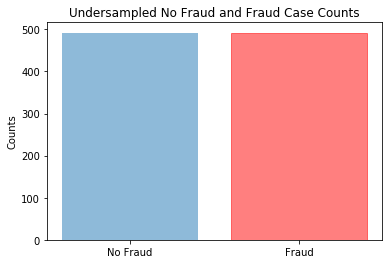

In [0]:
#Random Undersampling (OVERFIT)

#Shuffle
df = df.sample(frac=1)
#Extract all fraud rows from shuffled df
fraud_df = df[df['Class']==1]
#Extract 492 non fraud rows from  shuffled df
noFraud_df = df[df['Class']==0][:len(fraud_df)]

underSample_df =  pd.concat([fraud_df, noFraud_df])

#Re-shuffle to mix fraud and non fraud rows

underSample_df = underSample_df.sample(frac=1)

print('No Frauds', round(underSample_df['Class'].value_counts()[0]/len(underSample_df) * 100,2), '% of the undersampled dataset')
print('Frauds', round(underSample_df['Class'].value_counts()[1]/len(underSample_df) * 100,2), '% of the undersampled dataset')

#Count classes
underSample_counts = underSample_df['Class'].value_counts()
labels = ('No Fraud','Fraud')
y_pos = np.arange(len(labels))
# Plotting class bar graph
barlist = plt.bar(y_pos, underSample_counts, align='center', alpha=0.5)
barlist[1].set_color('r')
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title('Undersampled No Fraud and Fraud Case Counts')

plt.show()

In [0]:
underSample_counts

1    492
0    492
Name: Class, dtype: int64

## Sample some features from original df

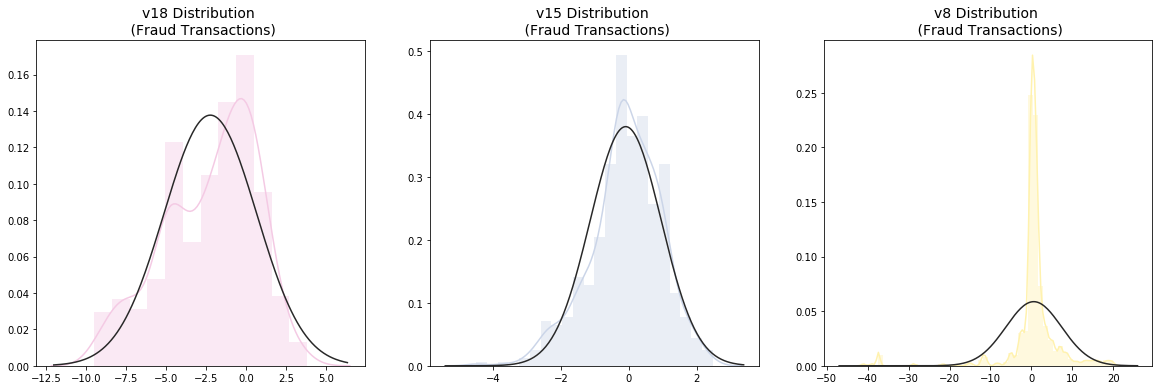

In [0]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v18_fraud_dist = df['V18'].loc[df['Class'] == 1].values
sns.distplot(v18_fraud_dist,ax=ax1, fit=norm, color='#F4CAE4')
ax1.set_title('v18 Distribution \n (Fraud Transactions)', fontsize=14)

v15_fraud_dist = df['V15'].loc[df['Class'] == 1].values
sns.distplot(v15_fraud_dist,ax=ax2, fit=norm, color='#CBD5E8')
ax2.set_title('v15 Distribution \n (Fraud Transactions)', fontsize=14)


v8_fraud_dist = df['V8'].loc[df['Class'] == 1].values
sns.distplot(v8_fraud_dist,ax=ax3, fit=norm, color='#FFF2AE')
ax3.set_title('v8 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

## Train test split of undersample df

In [0]:
X = underSample_df.drop('Class',axis=1)
y = underSample_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values



In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(fraud_df.shape)
print(underSample_df.shape)

(787, 30)
(197, 30)
(787,)
(197,)
(492, 31)
(984, 31)


# Undersampling

## Find best hyperparameter with GridSearchCV
Because Random Forest take a long time to run GridSearchCV, the saved best estimator for Random Forest is in the next cell named forest_backup

In [0]:
# Hyperparameter Tuning for each of 3 classifers Using GridSearchCV 
from sklearn.model_selection import GridSearchCV

# Support Vector Classifier
print("Support Vector Classifier")
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc_reg = grid_svc.best_estimator_


# Simple Logistic Regression 
print("Logistic regression")
logistic_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_logistic = GridSearchCV(LogisticRegression(), logistic_params)
grid_logistic.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
logistic_reg = grid_logistic.best_estimator_

# # Random Forest
# print("Random forest")
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 80, num = 5)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
# forest_params = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# grid_forest = GridSearchCV(RandomForestClassifier(), forest_params)
# grid_forest.fit(X_train, y_train)

# # Random forest best estimator
# forest = grid_forest.best_estimator_


Support Vector Classifier
Logistic regression


## Saved result for random forest grid search

In [0]:
# #result from random forest hyper parameter
# forest_backup=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
#                        max_depth=10, max_features='auto', max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=5,
#                        min_weight_fraction_leaf=0.0, n_estimators=200,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)

## Undersampling for Logistic Regression


In [0]:
# #Train-test split of ORIGINAL DF
underSample_X = df.drop('Class',axis=1)
underSample_y = df['Class']


skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_ind, test_ind in skf.split(underSample_X, underSample_y):
    print("Train:", train_ind, "Test:", test_ind)
    underSample_Xtrain, underSample_Xtest = underSample_X.iloc[train_ind], underSample_X.iloc[test_ind]
    underSample_ytrain, underSample_ytest = underSample_y.iloc[train_ind], underSample_y.iloc[test_ind]

underSample_Xtrain = underSample_Xtrain.values
underSample_Xtest = underSample_Xtest.values
underSample_ytrain = underSample_ytrain.values
underSample_ytest = underSample_ytest.values

underSample_accuracy_log = []
underSample_precision_log = []
underSample_recall_log = []
underSample_auc_log = []
underSample_f1_log = []

#NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_sample(underSample_X.values, underSample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))


#under sample during cross validation
for train, test in skf.split(underSample_Xtrain,underSample_ytrain):
  underSample_pipeline_log = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),logistic_reg)

  underSample_model_log = underSample_pipeline_log.fit(underSample_Xtrain[train], underSample_ytrain[train])

  underSample_prediction_log = underSample_model_log.predict(underSample_Xtrain[test])

  underSample_accuracy_log.append(underSample_pipeline_log.score(orig_Xtrain[test], orig_ytrain[test]))
  underSample_precision_log.append(precision_score(orig_ytrain[test], underSample_prediction_log))
  underSample_recall_log.append(recall_score(orig_ytrain[test], underSample_prediction_log))
  underSample_f1_log.append(f1_score(orig_ytrain[test], underSample_prediction_log))
  underSample_auc_log.append(roc_auc_score(orig_ytrain[test], underSample_prediction_log))

Train: [ 56956  56957  56958 ... 284804 284805 284806] Test: [    0     1     2 ... 59012 59492 60069]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56956  56957  56958 ... 113929 113930 113931]
Train: [     0      1      2 ... 284804 284805 284806] Test: [109152 109336 109634 ... 172201 172387 173710]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170882 170883 170884 ... 230526 230965 231041]
Train: [     0      1      2 ... 230526 230965 231041] Test: [227837 227838 227839 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [0]:
print("Logistic Regression: ")
print('---' * 45)
print("Accuracy Score: {:.2f}".format(np.mean(underSample_accuracy_log)))
print("Precision Score: {:.2f}".format(np.mean(underSample_precision_log)))
print("Recall Score: {:.2f}".format(np.mean(underSample_recall_log)))
print("F1 Score: {:.2f}".format(np.mean(underSample_f1_log)))
print('---' * 45)

Logistic Regression: 
---------------------------------------------------------------------------------------------------------------------------------------
Accuracy Score: 0.50
Precision Score: 0.00
Recall Score: 0.47
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


Average precision-recall score Logistic Regression: 0.06


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve for Logistic Regression: \n Average Precision-Recall Score =0.06')

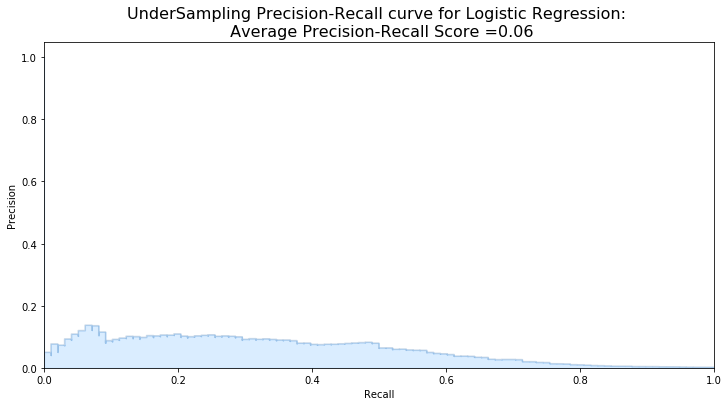

In [0]:
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

undersample_yscore_log = logistic_reg.decision_function(orig_Xtest)

undersample_average_precision_log = average_precision_score(orig_ytest, undersample_yscore_log)

print('Average precision-recall score Logistic Regression: {0:0.2f}'.format(
      undersample_average_precision_log))

fig = plt.figure(figsize=(12,6))

precision_log, recall_log, _ = precision_recall_curve(orig_ytest, undersample_yscore_log)

plt.step(recall_log, precision_log, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall_log, precision_log, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve for Logistic Regression: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision_log), fontsize=16)

## Undersampling Logistic Regression Confusion Matrix

Confusion matrix, without normalization
[[33261 23602]
 [    8    90]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


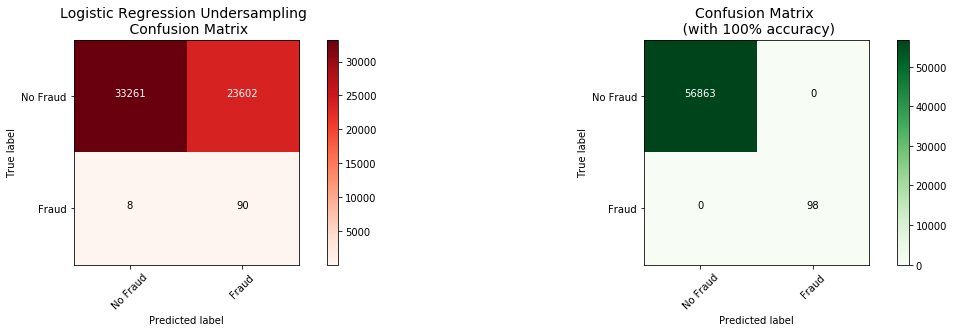

In [0]:
y_pred_log_reg_und = logistic_reg.predict(orig_Xtest)
log_reg_cf_und = confusion_matrix(orig_ytest, y_pred_log_reg_und)
actual_cm_und = confusion_matrix(orig_ytest, orig_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(log_reg_cf_und, labels, title="Logistic Regression Undersampling \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm_und, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

## Undersampling for SVC

In [0]:
underSample_accuracy_svc = []
underSample_precision_svc = []
underSample_recall_svc = []
underSample_auc_svc = []
underSample_f1_svc = []

#NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_sample(underSample_X.values, underSample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))


#under sample during cross validation
for train, test in skf.split(underSample_Xtrain,underSample_ytrain):
  underSample_pipeline_svc = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),svc_reg)

  underSample_model_svc = underSample_pipeline_svc.fit(underSample_Xtrain[train], underSample_ytrain[train])

  underSample_prediction_svc = underSample_model_svc.predict(underSample_Xtrain[test])

  underSample_accuracy_svc.append(underSample_pipeline_svc.score(orig_Xtrain[test], orig_ytrain[test]))
  underSample_precision_svc.append(precision_score(orig_ytrain[test], underSample_prediction_svc))
  underSample_recall_svc.append(recall_score(orig_ytrain[test], underSample_prediction_svc))
  underSample_f1_svc.append(f1_score(orig_ytrain[test], underSample_prediction_svc))
  underSample_auc_svc.append(roc_auc_score(orig_ytrain[test], underSample_prediction_svc))

NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [0]:
print("SVC: ")
print('---' * 45)
print("Accuracy Score: {:.2f}".format(np.mean(underSample_accuracy_svc)))
print("Precision Score: {:.2f}".format(np.mean(underSample_precision_svc)))
print("Recall Score: {:.2f}".format(np.mean(underSample_recall_svc)))
print("F1 Score: {:.2f}".format(np.mean(underSample_f1_svc)))
print('---' * 45)

SVC: 
---------------------------------------------------------------------------------------------------------------------------------------
Accuracy Score: 0.42
Precision Score: 0.00
Recall Score: 0.60
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


[ 3.55677967  7.49739964  5.22283595 ... -1.72674189  1.34480871
  1.68901171]
Average precision-recall score SVC: 0.03


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve for SVC: \n Average Precision-Recall Score =0.03')

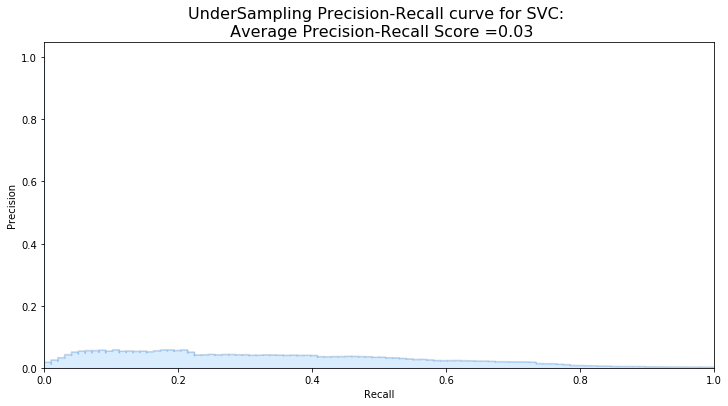

In [0]:
undersample_yscore_svc = svc_reg.decision_function(orig_Xtest)
print(undersample_yscore_svc)
undersample_average_precision_svc = average_precision_score(orig_ytest, undersample_yscore_svc)

print('Average precision-recall score SVC: {0:0.2f}'.format(
      undersample_average_precision_svc))

fig = plt.figure(figsize=(12,6))

precision_svc, recall_svc, _ = precision_recall_curve(orig_ytest, undersample_yscore_svc)

plt.step(recall_svc, precision_svc, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall_svc, precision_svc, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve for SVC: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision_svc), fontsize=16)

##  Undersampling SVC Confusion Matrix

Confusion matrix, without normalization
[[26909 29954]
 [    7    91]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


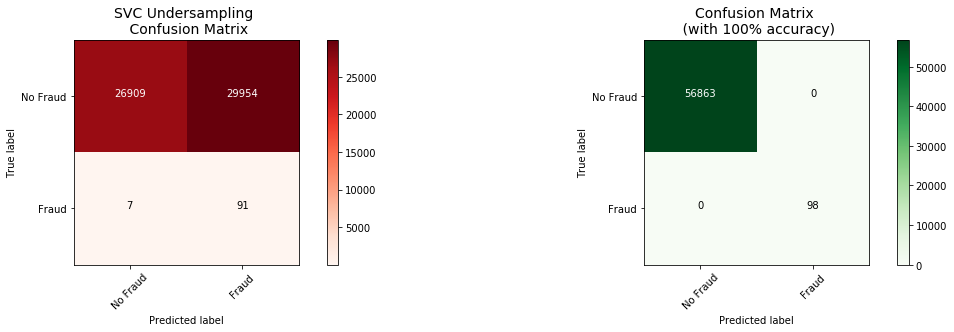

In [0]:
y_pred_svc_reg_und = svc_reg.predict(orig_Xtest)
svc_reg_cf_und = confusion_matrix(orig_ytest, y_pred_svc_reg_und)
actual_cm_und_svc = confusion_matrix(orig_ytest, orig_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(svc_reg_cf_und, labels, title="SVC Undersampling \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm_und_svc, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

## Undersampling for Random Forest

In [0]:
underSample_accuracy_rf = []
underSample_precision_rf = []
underSample_recall_rf = []
underSample_auc_rf = []
underSample_f1_rf = []

#NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_sample(underSample_X.values, underSample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))


#under sample during cross validation
for train, test in skf.split(underSample_Xtrain,underSample_ytrain):
  underSample_pipeline_rf = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),forest_backup)

  underSample_model_rf = underSample_pipeline_rf.fit(underSample_Xtrain[train], underSample_ytrain[train])

  underSample_prediction_rf = underSample_model_rf.predict(underSample_Xtrain[test])

  underSample_accuracy_rf.append(underSample_pipeline_rf.score(orig_Xtrain[test], orig_ytrain[test]))
  underSample_precision_rf.append(precision_score(orig_ytrain[test], underSample_prediction_rf))
  underSample_recall_rf.append(recall_score(orig_ytrain[test], underSample_prediction_rf))
  underSample_f1_rf.append(f1_score(orig_ytrain[test], underSample_prediction_rf))
  underSample_auc_rf.append(roc_auc_score(orig_ytrain[test], underSample_prediction_rf))

NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [0]:
print("Random Forest: ")
print('---' * 45)
print("Accuracy Score: {:.2f}".format(np.mean(underSample_accuracy_rf)))
print("Precision Score: {:.2f}".format(np.mean(underSample_precision_rf)))
print("Recall Score: {:.2f}".format(np.mean(underSample_recall_rf)))
print("F1 Score: {:.2f}".format(np.mean(underSample_f1_rf)))
print('---' * 45)

Random Forest: 
---------------------------------------------------------------------------------------------------------------------------------------
Accuracy Score: 0.04
Precision Score: 0.00
Recall Score: 0.95
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


[1.         1.         0.99583333 ... 0.60127591 0.94112361 0.94416667]
Average precision-recall score Random Forest: 0.78


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve for Random Forest: \n Average Precision-Recall Score =0.78')

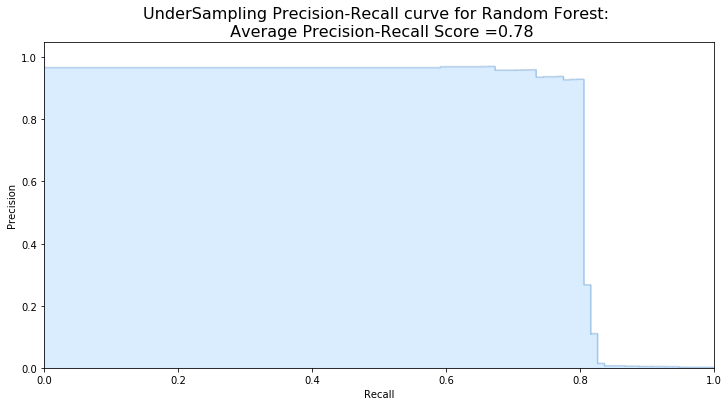

In [0]:
undersample_yscore_rf = forest_backup.predict_proba(orig_Xtest)[:,-1]
print(undersample_yscore_rf)
undersample_average_precision_rf = average_precision_score(orig_ytest, undersample_yscore_rf)

print('Average precision-recall score Random Forest: {0:0.2f}'.format(
      undersample_average_precision_rf))

fig = plt.figure(figsize=(12,6))

precision_rf, recall_rf, _ = precision_recall_curve(orig_ytest, undersample_yscore_rf)

plt.step(recall_rf, precision_rf, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall_rf, precision_rf, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve for Random Forest: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision_rf), fontsize=16)

## Undersampling Random Forest Confusion Matrix

Confusion matrix, without normalization
[[ 4057 52806]
 [    1    97]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


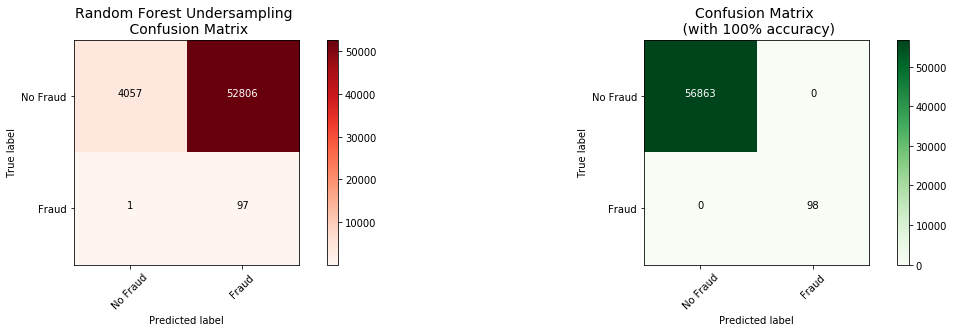

In [0]:
y_pred_rf_reg_und = forest_backup.predict(orig_Xtest)
rf_reg_cf_und = confusion_matrix(orig_ytest, y_pred_rf_reg_und)
actual_cm_und_rf = confusion_matrix(orig_ytest, orig_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(rf_reg_cf_und, labels, title="Random Forest Undersampling \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm_und_rf, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [0]:
svc_fpr, svc_tpr, svc_threshold = roc_curve(orig_ytest, undersample_yscore_svc)
logistic_fpr, logistic_tpr, logistic_thresold = roc_curve(orig_ytest, undersample_yscore_log)
forest_fpr, forest_tpr, forest_threshold = roc_curve(orig_ytest, undersample_yscore_rf)


def graph_roc_curve_multiple(logistic_fpr, logistic_tpr, svc_fpr, svc_tpr, forest_fpr, forest_tpr):
    plt.figure(figsize=(12,8))
    plt.title('ROC Curve of 3 Classifiers', fontsize=18)
    plt.plot(logistic_fpr, logistic_tpr, color='green',label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(orig_ytest, undersample_yscore_log)))
    plt.plot(svc_fpr, svc_tpr, color='red', label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(orig_ytest, undersample_yscore_svc)))
    plt.plot(forest_fpr, forest_tpr, color='blue', label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(orig_ytest, undersample_yscore_rf)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    # plt.annotate('Minimum ROC Score of 50%', xy=(0.5, 0.5), xytext=(0.6, 0.3),
    #             arrowprops=dict(facecolor='#6E726D', shrink=0.05),
    #             )
    plt.legend()
    
graph_roc_curve_multiple(logistic_fpr, logistic_tpr, svc_fpr, svc_tpr, forest_fpr, forest_tpr)
plt.show()

# Oversampling (SMOTE)

## SMOTE for Logistic Regression

In [0]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


#Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
print("Logistic Regression")

# Implementing SMOTE Technique 
# Cross Validating the right way
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
Logistic Regression
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9437915535781884
precision: 0.054607379446459645
recall: 0.9111002921129504
f1: 0.10157404061330857
---------------------------------------------------------------------------------------------------------------------------------------


In [0]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56863
       Fraud       0.06      0.87      0.11        98

    accuracy                           0.98     56961
   macro avg       0.53      0.92      0.55     56961
weighted avg       1.00      0.98      0.99     56961



Average precision-recall score: 0.69


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.69')

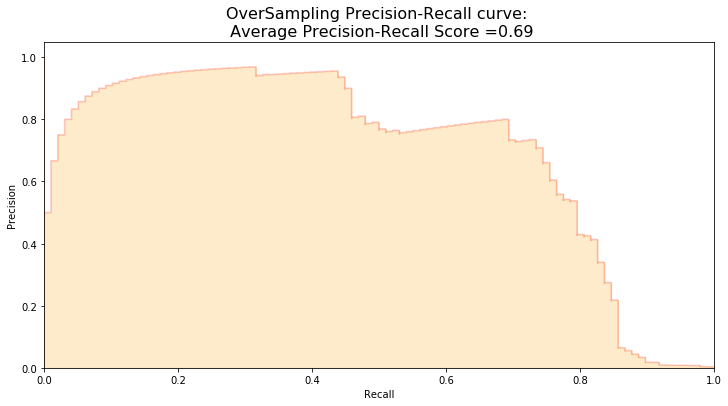

In [0]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [0]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[55521  1342]
 [   13    85]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


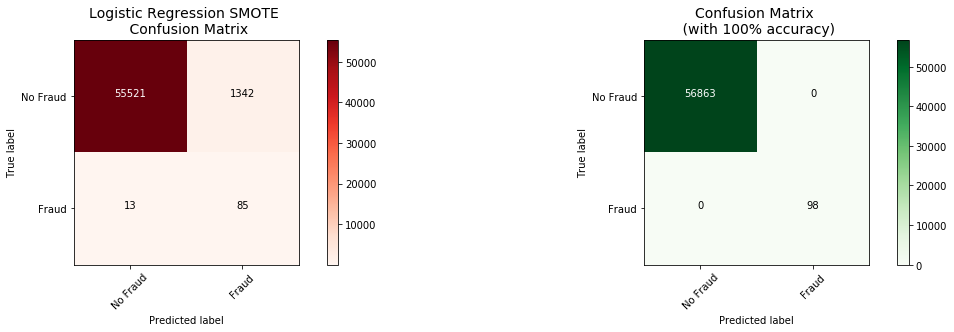

In [0]:
y_pred_log_reg = best_est.predict(original_Xtest)
log_reg_cf = confusion_matrix(original_ytest, y_pred_log_reg)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(log_reg_cf, labels, title="Logistic Regression SMOTE \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

## SMOTE for SVM

In [0]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
rand_svc = RandomizedSearchCV(SVC(), svc_params, n_iter=1)
print("Support Vector Classifier")

# Implementing SMOTE Technique 
# Cross Validating the right way
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_svc) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_svc.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)



Support Vector Classifier


In [0]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

In [0]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [0]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
y_pred_log_reg = best_est.predict(original_Xtest)
log_reg_cf = confusion_matrix(original_ytest, y_pred_log_reg)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(log_reg_cf, labels, title="SVM SMOTE \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

## SMOTE for Random Forest

In [0]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Random Forest Classifier
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
forest_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rand_forest = RandomizedSearchCV(RandomForestClassifier(), forest_params, n_iter=1)

# Implementing SMOTE Technique 
# Cross Validating the right way
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_forest) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_forest.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9972569380238049
precision: 0.6184342462298666
recall: 0.6734501785134697
f1: 0.47784496410681127
---------------------------------------------------------------------------------------------------------------------------------------


In [0]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



Average precision-recall score: 0.81


Text(0.5, 1.0, 'OverSampling Random Forest Precision-Recall curve: \n Average Precision-Recall Score =0.81')

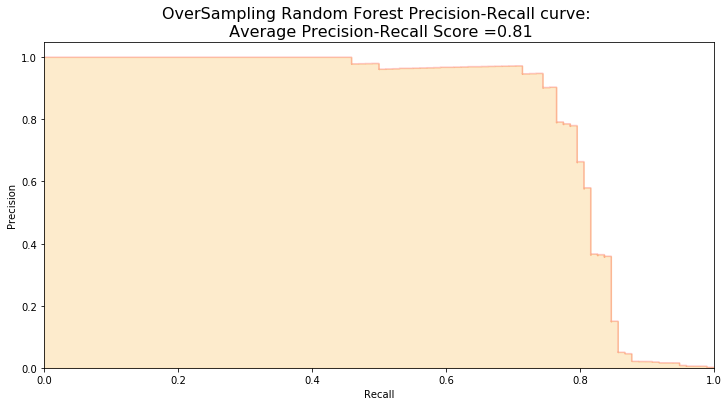

In [0]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_score = best_est.predict_proba(original_Xtest)[:,-1]
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Random Forest Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [0]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[56863     0]
 [   98     0]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


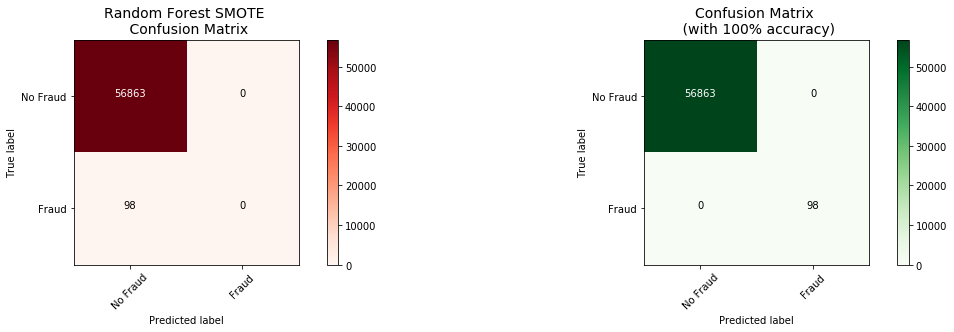

In [0]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = best_est.predict(original_Xtest)
log_reg_cf = confusion_matrix(original_ytest, y_pred_log_reg)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(log_reg_cf, labels, title="Random Forest SMOTE \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

# Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE)

## Neural Networks Testing Random UnderSampling Data

In [0]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1] #number of features

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [0]:
X_train.shape

(787, 30)

In [0]:
undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [0]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 629 samples, validate on 158 samples
Epoch 1/20





 - 5s - loss: 0.6242 - acc: 0.6041 - val_loss: 0.4179 - val_acc: 0.7152
Epoch 2/20
 - 0s - loss: 0.3952 - acc: 0.8315 - val_loss: 0.2909 - val_acc: 0.9051
Epoch 3/20
 - 0s - loss: 0.2994 - acc: 0.9046 - val_loss: 0.2383 - val_acc: 0.9241
Epoch 4/20
 - 0s - loss: 0.2455 - acc: 0.9253 - val_loss: 0.2105 - val_acc: 0.9367
Epoch 5/20
 - 0s - loss: 0.2094 - acc: 0.9332 - val_loss: 0.1934 - val_acc: 0.9367
Epoch 6/20
 - 0s - loss: 0.1820 - acc: 0.9412 - val_loss: 0.1867 - val_acc: 0.9430
Epoch 7/20
 - 0s - loss: 0.1632 - acc: 0.9444 - val_loss: 0.1806 - val_acc: 0.9430
Epoch 8/20
 - 0s - loss: 0.1490 - acc: 0.9475 - val_loss: 0.1813 - val_acc: 0.9430
Epoch 9/20
 - 0s - loss: 0.1385 - acc: 0.9475 - val_loss: 0.1903 - val_acc: 0.9430
Epoch 10/20
 - 0s - loss: 0.1276 - acc: 0.9523 - val_loss: 0.1888 - val_acc: 0.9430
Epoch 11/20
 - 0s - l

In [0]:
undersample_predictions = undersample_model.predict(orig_Xtest, batch_size=200, verbose=0)

In [0]:
undersample_fraud_predictions = undersample_model.predict_classes(orig_Xtest, batch_size=200, verbose=0)

In [0]:
print(undersample_predictions.shape)
print(orig_Xtest.shape)
print(undersample_fraud_predictions.shape)


(56961, 2)
(56961, 30)
(56961,)


In [0]:
undersample_predictions

array([[0.01096449, 0.98903555],
       [0.00793885, 0.99206114],
       [0.02315091, 0.97684914],
       ...,
       [0.7455965 , 0.2544035 ],
       [0.9803796 , 0.01962041],
       [0.8194305 , 0.18056956]], dtype=float32)

In [0]:
undersample_fraud_predictions

array([1, 1, 1, ..., 0, 0, 0])

In [0]:
# import itertools

# # Create a confusion matrix
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title, fontsize=14)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

In [0]:
# from sklearn.metrics import confusion_matrix
# undersample_cm = confusion_matrix(orig_ytest, undersample_fraud_predictions)
# actual_cm = confusion_matrix(orig_ytest, orig_ytest)
# labels = ['No Fraud', 'Fraud']

# fig = plt.figure(figsize=(18,8))

# fig.add_subplot(221)
# plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Blues)

# fig.add_subplot(222)
# plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Oranges)

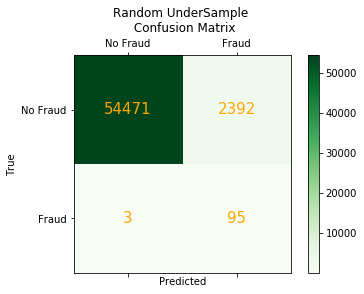

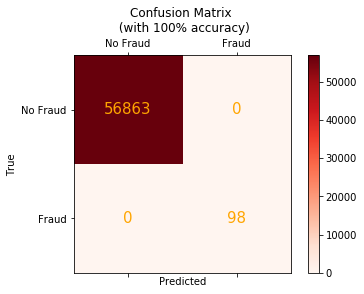

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
undersample_cm = confusion_matrix(orig_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(orig_ytest, orig_ytest)
labels = ['No Fraud', 'Fraud']

#Random UnderSample Confusion Matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.matshow(undersample_cm,cmap=plt.cm.Greens)  # plot matrix    
fig.colorbar(cax) 
plt.title("Random UnderSample \n Confusion Matrix",y=1.08)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(undersample_cm)):
    for j in range(len(undersample_cm)):
        plt.annotate(undersample_cm[i,j],xy=(j,i),horizontalalignment='center',verticalalignment='center',size=15,color='orange') 
plt.show()


#Confusion Matrix (with 100% accuracy
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.matshow(actual_cm,cmap=plt.cm.Reds)  # plot matrix    
fig.colorbar(cax) 
plt.title("Confusion Matrix \n (with 100% accuracy)",y=1.08)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(actual_cm)):
    for j in range(len(actual_cm)):
        plt.annotate(actual_cm[i,j],xy=(j,i),horizontalalignment='center',verticalalignment='center',size=15,color='orange') 
plt.show()

## Neural Networks Testing OverSampling (SMOTE)

In [0]:
#####################################################
###Confusion matrix
#####################################################
print("Random UnderSample: precison and recall score")
TP = undersample_cm[0,0]
TN = undersample_cm[1,0]
FP = undersample_cm[0,1]
FN = undersample_cm[1,1]

precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN) / (TP+FP+FN+TN)
F1_Measure = 2*TP / (2*TP+FP+FN) #F1_Measure = 2PR / (P+R)  
print("precision score:",precision)
print("recall score:",recall)
print("accuracy score:",accuracy)
print("F1 measure:",F1_Measure,"\n")


print("Postivie control (100% accuracy): precison and recall score")
TP = actual_cm[0,0]
TN = actual_cm[1,0]
FP = actual_cm[0,1]
FN = actual_cm[1,1]

accuracy = (TP+TN) / (TP+FP+FN+TN)
F1_Measure = 2*TP / (2*TP+FP+FN) #F1_Measure = 2PR / (P+R) 
print("precision score:",precision)
print("recall score:",recall)
print("accuracy score:",accuracy)
print("F1 measure:",F1_Measure,"\n")


#####################################################
###precision_recall_curve
#####################################################
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

average_precision = average_precision_score(orig_ytest, undersample_fraud_predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(orig_ytest, undersample_fraud_predictions)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Neural Network UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)
plt.show()

In [0]:
# https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
# Create oversampling datasets 

from imblearn.over_sampling import SMOTE
sm_Xtrain, sm_ytrain = SMOTE().fit_resample(orig_Xtrain, orig_ytrain)

print(sorted(Counter(sm_ytrain).items()))
print(sm_Xtrain.shape)
print(sm_ytrain.shape)
print(np.count_nonzero(orig_ytrain))
print(np.count_nonzero(sm_ytrain))

[(0, 227452), (1, 227452)]
(454904, 30)
(454904,)
394
227452


No Frauds 50.0 % of the Oversampled dataset
Frauds 50.0 % of the Oversampled dataset
[[     0 227452]
 [     1 227452]]
[227452, 227452]


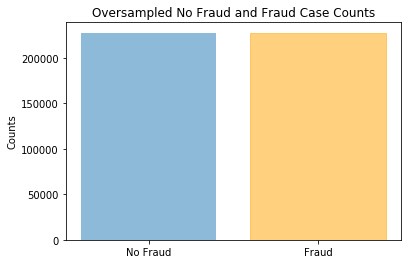

In [0]:
print('No Frauds', round(np.count_nonzero(sm_ytrain)/len(sm_ytrain) * 100,2), '% of the Oversampled dataset')
print('Frauds', round((len(sm_ytrain)-np.count_nonzero(sm_ytrain))/len(sm_ytrain) * 100,2), '% of the Oversampled dataset')

labels = ('No Fraud','Fraud')
y_pos = np.arange(len(labels))

#Count classes
OverSample_counts = np.array(np.unique(sm_ytrain, return_counts=True)).T
print(OverSample_counts)
OverSample_counts= [round(np.count_nonzero(sm_ytrain)),round((len(sm_ytrain)-np.count_nonzero(sm_ytrain)))]
print(OverSample_counts)
# Plotting class bar graph
barlist = plt.bar(y_pos, OverSample_counts, align='center', alpha=0.5)
barlist[1].set_color('orange')
plt.xticks(y_pos, labels)
plt.ylabel('Counts')
plt.title('Oversampled No Fraud and Fraud Case Counts')

plt.show()

In [0]:
n_inputs = sm_Xtrain.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [0]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
oversample_model.fit(sm_Xtrain, sm_ytrain, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 363923 samples, validate on 90981 samples
Epoch 1/20
 - 6s - loss: 0.0575 - acc: 0.9806 - val_loss: 0.0202 - val_acc: 0.9987
Epoch 2/20
 - 5s - loss: 0.0131 - acc: 0.9973 - val_loss: 0.0071 - val_acc: 0.9998
Epoch 3/20
 - 6s - loss: 0.0086 - acc: 0.9984 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 4/20
 - 5s - loss: 0.0067 - acc: 0.9989 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 5/20
 - 6s - loss: 0.0054 - acc: 0.9991 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 6/20
 - 6s - loss: 0.0046 - acc: 0.9993 - val_loss: 0.0021 - val_acc: 0.9999
Epoch 7/20
 - 5s - loss: 0.0042 - acc: 0.9994 - val_loss: 8.2420e-04 - val_acc: 1.0000
Epoch 8/20
 - 5s - loss: 0.0040 - acc: 0.9994 - val_loss: 0.0013 - val_acc: 0.9999
Epoch 9/20
 - 5s - loss: 0.0035 - acc: 0.9995 - val_loss: 4.3138e-04 - val_acc: 1.0000
Epoch 10/20
 - 6s - loss: 0.0035 - acc: 0.9995 - val_loss: 0.0027 - val_acc: 0.9995
Epoch 11/20
 - 6s - loss: 0.0032 - acc: 0.9996 - val_loss: 1.9777e-04 - val_acc: 1.0000
Epoch 12/20
 - 5s - lo

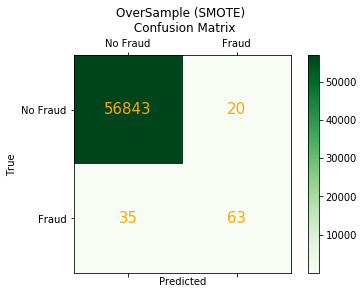

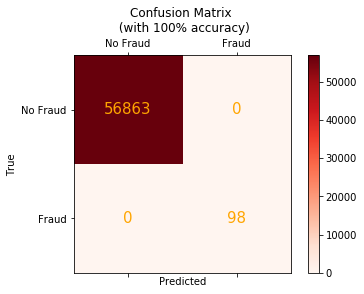

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

oversample_predictions = oversample_model.predict(orig_Xtest, batch_size=200, verbose=0)
oversample_fraud_predictions = oversample_model.predict_classes(orig_Xtest, batch_size=200, verbose=0)

oversample_smote = confusion_matrix(orig_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(orig_ytest, orig_ytest)
labels = ['No Fraud', 'Fraud']

#OverSample (SMOTE) Confusion Matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.matshow(oversample_smote,cmap=plt.cm.Greens)  # plot matrix    
fig.colorbar(cax) 
plt.title("OverSample (SMOTE) \n Confusion Matrix",y=1.08)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(oversample_smote)):
    for j in range(len(oversample_smote)):
        plt.annotate(oversample_smote[i,j],xy=(j,i),horizontalalignment='center',verticalalignment='center',size=15,color='orange') 
plt.show()


#Confusion Matrix (with 100% accuracy
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.matshow(actual_cm,cmap=plt.cm.Reds)  # plot matrix    
fig.colorbar(cax) 
plt.title("Confusion Matrix \n (with 100% accuracy)",y=1.08)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(actual_cm)):
    for j in range(len(actual_cm)):
        plt.annotate(actual_cm[i,j],xy=(j,i),horizontalalignment='center',verticalalignment='center',size=15,color='orange') 
plt.show()

In [0]:
#####################################################
###Confusion matrix
#####################################################
print("OverSample (SMOTE): precison and recall score")
TP = oversample_smote[0,0]
TN = oversample_smote[1,0]
FP = oversample_smote[0,1]
FN = oversample_smote[1,1]

precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN) / (TP+FP+FN+TN)
F1_Measure = 2*TP / (2*TP+FP+FN) #F1_Measure = 2PR / (P+R) = 
print("precision score:",precision)
print("recall score:",recall)
print("accuracy score:",accuracy)
print("F1 measure:",F1_Measure,"\n")

#####################################################
###precision_recall_curve
#####################################################
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

average_precision = average_precision_score(orig_ytest, oversample_fraud_predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(orig_ytest, oversample_fraud_predictions)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Neural Network OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)
plt.show()